<a href="https://colab.research.google.com/github/gideon525/Business-Location/blob/main/Lecture_19_Practice_Problems_gideon_abunuma_graduate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Problems
### Lecture 19
Answer each number in a separate cell

Rename this notebook by adding your first, last names and either <font color=red> undergraduate</font> or <font color=red>graduate</font> as the suffix of the current name.
    
    ex. Lecture_19_Practice_Problems_Jiajia_Sun_graduate
    
This lab is due at <font color=red>**9 pm on November 3rd, 2023**</font>.

Once you finish all the tasks, please click the 'Share' button on the top right corner of this notebook, and enter the following two gmail addresses: jiajiasun16@gmail.com and wuboming@gmail.com. Please do not send your notebook by email. Please make sure that you submit your notebook according to the instructions described here. Failing to do so might result in penalty applied to your scores.

## 1. Meshgrid and contour
- Write a  lambda function for the equation
$$ c=f(a,b)=(1-a^2+b^3) e^{-(a^2+b^2)/2}$$.
- Create two arrays- a and b- that range from -3 to 3 in increments of 0.1.
- Make a meshgrid from a and b.
- Evaluate c for the meshgrid
- Make a contour plot of a,b and c.  

## 2. Mkigrf and maps
- Jiajia moved to Houston in 2017.    Use the  functions in the  **mkigrf** module to do the following:
    - Calculate the inclination, declination, and strength of the field that year.
    - Create a map of the strength of the field in 2017
        - include coastlines
        - a title
        - a color bar
    - Make a plot of declination in Houston (29.76,-95.37) over the last 100 years.

1. Meshgrid and contour
Write a lambda function for the equation
c=f(a,b)=(1−a2+b3)e−(a2+b2)/2
.
Create two arrays- a and b- that range from -3 to 3 in increments of 0.1.
Make a meshgrid from a and b.
Evaluate c for the meshgrid
Make a contour plot of a,b and c.

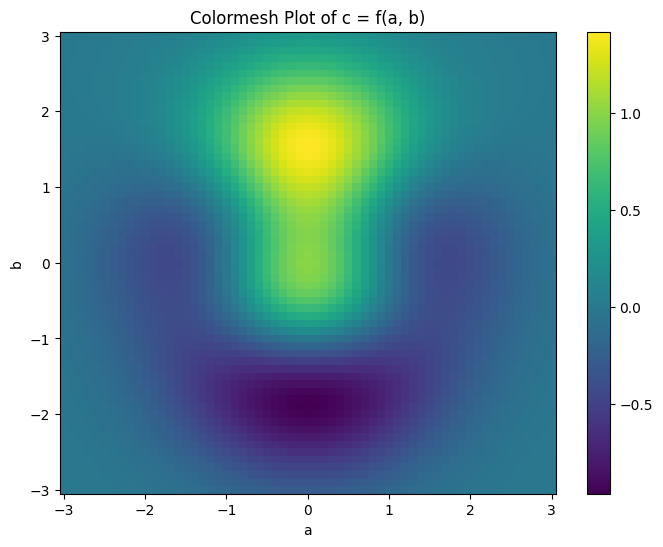

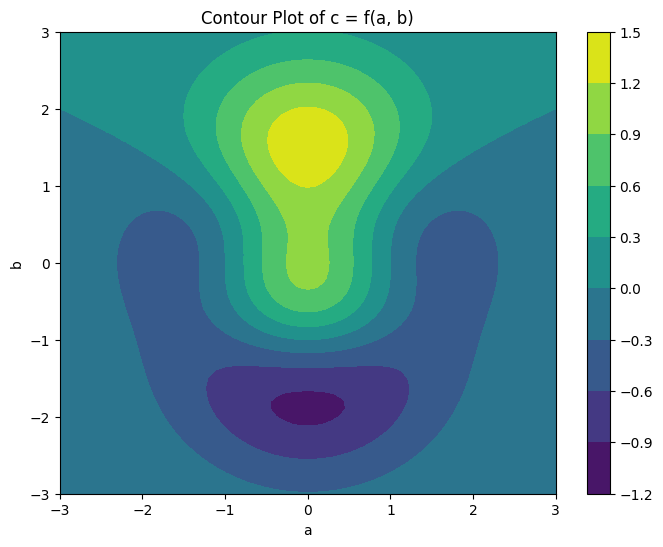

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the lambda function for c=f(a,b)
c_func = lambda a, b: (1 - a**2 + b**3) * np.exp(-(a**2 + b**2) / 2)

# Create arrays for a and b ranging from -3 to 3 in increments of 0.1
a = np.arange(-3, 3.1, 0.1) # make a 1D array from -3.3 to 3.2 with a spacing of .1
b = np.arange(-3, 3.1, 0.1) #ditto

# Create a meshgrid from a and b
A, B = np.meshgrid(a, b)

# Evaluate c for the meshgrid
C = c_func(A, B)

# Make a colormesh plot of a, b, and c
plt.figure(figsize=(8, 6))
colormesh_plot = plt.pcolormesh(A, B, C, cmap='viridis')
plt.colorbar(colormesh_plot)  # Display a colorbar
plt.xlabel('a')
plt.ylabel('b')
plt.title('Colormesh Plot of c = f(a, b)')
plt.show()

# Make a contour plot of a, b, and c
plt.figure(figsize=(8, 6))
contour_plot = plt.contourf(A, B, C, cmap='viridis')
plt.colorbar(contour_plot)  # Display a colorbar
plt.xlabel('a')
plt.ylabel('b')
plt.title('Contour Plot of c = f(a, b)')
plt.show()

2. Mkigrf and maps
Jiajia moved to Houston in 2017. Use the functions in the mkigrf module to do the following:
Calculate the inclination, declination, and strength of the field that year.
Create a map of the strength of the field in 2017
include coastlines
a title
a color bar
Make a plot of declination in Houston (29.76,-95.37) over the last 100 years.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
from matplotlib import cm

!pip install cartopy
import cartopy
import cartopy.crs as ccrs
from cartopy import config
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/UH_PythonForEarthScienceStudents_Fall2023/Lecture_19_Gridding
!pip install mkigrf

import mkigrf
from mkigrf import IGRF

Houston_lat=29.76
Houston_lon=264.63
x,y,z,f=mkigrf.doigrf(Houston_lon,Houston_lat,2018)
Dec,Inc,B=mkigrf.cart2dir(x,y,z)
#print ('%7.1f'%(Dec)) # notice the formatting
print(f"{Dec:.1f}")

# Calculate magnetic field parameters for Houston in 2017
date=2017
lon_0=0 # we can specify the grid spacing and the intended 0 longitude for the plot
Ds,Is,Bs,lons,lats=mkigrf.magMap(date,lon_0=lon_0)

#Create the field strenght
ax = plt.axes(projection=ccrs.Hammer(central_longitude=lon_0))
X, Y = np.meshgrid(lons,lats)
lincr=2
levmax=round(Bs.max())+lincr
levmin=round(Bs.min()-lincr)
levels=np.arange(levmin,levmax,lincr)
m=ax.contourf(X, Y, Bs, levels,transform=ccrs.PlateCarree(),cmap=cm.jet)
ax.set_global()
ax.coastlines()
cbar=plt.colorbar(m,orientation='horizontal') # put on a color bar of intensities
plt.title('Field strength ($\mu$T): '+str(date));

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/UH_PythonForEarthScienceStudents_Fall2023/Lecture_19_Gridding
ERROR: Could not find a version that satisfies the requirement mkigrf (from versions: none)
ERROR: No matching distribution found for mkigrf


ImportError: ignored